In [1]:
# Intialization
import os
import sys

os.environ["SPARK_HOME"] = "/home/talentum/spark"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3.6" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/bin/python3"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

# NOTE: Whichever package you want mention here.
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0 pyspark-shell' 
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.3 pyspark-shell'
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'

In [2]:
#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("My work").enableHiveSupport().getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
from pyspark import SparkContext                                    # Importing SparkContext
from pyspark.sql import SparkSession, Window, Row                   # Importing importing methods for creating a cluster
from pyspark.sql import functions as F                              # Importing SQL Functions
from pyspark.sql.functions import col, isnan, when, count           # Importing relevant dataframe functions
from pyspark.sql.functions import *                                 # Importing inbuilt SQL Functions
from pyspark.sql.types import *                                     # Importing SQL types
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Popular plotting library
%matplotlib inline                                                  # To plot graphs inline the notebook
import seaborn as sns                                               # Advanced plotting library
from handyspark import *                                            # Helper library to plot graphs
#-------------------------------------------------------------------------------------------------------------------------------
from pyspark.ml.feature import VectorAssembler                      # For processing dataset for ML
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------

UsageError: unrecognized arguments: # To plot graphs inline the notebook


In [4]:
df =spark.read.parquet("file:///home/talentum/shared/final.parquet")

In [5]:
df.printSchema()

root
 |-- bp_mmhg: string (nullable = true)
 |-- benzene_ug_m3: string (nullable = true)
 |-- mp_xylene_ug_m3: string (nullable = true)
 |-- o_xylene_ug_m3: string (nullable = true)
 |-- xylene_ug_m3: string (nullable = true)
 |-- co_mg_m3: string (nullable = true)
 |-- nh3_ug_m3: string (nullable = true)
 |-- so2_ug_m3: double (nullable = true)
 |-- at_degree: string (nullable = true)
 |-- rf_mm: string (nullable = true)
 |-- temp_degree_c: string (nullable = true)
 |-- from_date: string (nullable = true)
 |-- eth_benzene_ug_m3: string (nullable = true)
 |-- state: string (nullable = true)
 |-- temp_: string (nullable = true)
 |-- at_degree_c: string (nullable = true)
 |-- wd_degree: string (nullable = true)
 |-- wd_deg: string (nullable = true)
 |-- nox_ppb: string (nullable = true)
 |-- no_ug_m3: double (nullable = true)
 |-- toluene_ug_m3: string (nullable = true)
 |-- rh_degree: string (nullable = true)
 |-- nox_ug_m3: string (nullable = true)
 |-- to_date: string (nullable = true

In [134]:
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,bp_mmhg,string
1,benzene_ug_m3,string
2,mp_xylene_ug_m3,string
3,o_xylene_ug_m3,string
4,xylene_ug_m3,string
5,co_mg_m3,string
6,nh3_ug_m3,string
7,so2_ug_m3,double
8,at_degree,string
9,rf_mm,string


In [6]:
df.select("from_date").show(5)

+----------------+
|       from_date|
+----------------+
|06-07-2016 22:00|
|16-07-2016 12:00|
|29-07-2016 17:00|
|12-08-2016 15:00|
|13-08-2016 23:00|
+----------------+
only showing top 5 rows



In [5]:
# Shape of the dataset
print('Shape of the dataset: ', (df.count(), len(df.columns)))

Shape of the dataset:  (12119438, 32)


In [8]:
df.show(2)

+-------+-------------+---------------+--------------+------------+--------+---------+---------+---------+-----+-------------+----------------+-----------------+--------------+-----+-----------+---------+------+-------+--------+-------------+---------+---------+----------------+-----------+----------+--------+-------+------+---------+-----------+-----+
|bp_mmhg|benzene_ug_m3|mp_xylene_ug_m3|o_xylene_ug_m3|xylene_ug_m3|co_mg_m3|nh3_ug_m3|so2_ug_m3|at_degree|rf_mm|temp_degree_c|       from_date|eth_benzene_ug_m3|         state|temp_|at_degree_c|wd_degree|wd_deg|nox_ppb|no_ug_m3|toluene_ug_m3|rh_degree|nox_ug_m3|         to_date|ozone_ug_m3|pm10_ug_m3|sr_w_mt2|vws_m_s|ws_m_s|no2_ug_m3|pm2_5_ug_m3| rh_%|
+-------+-------------+---------------+--------------+------------+--------+---------+---------+---------+-----+-------------+----------------+-----------------+--------------+-----+-----------+---------+------+-------+--------+-------------+---------+---------+----------------+-----------

In [13]:
print("Let's print first 5 data rows:")
df.limit(5).toPandas()

Let's print first 5 data rows:


,bp_mmhg,benzene_ug_m3,mp_xylene_ug_m3,o_xylene_ug_m3,xylene_ug_m3,co_mg_m3,nh3_ug_m3,so2_ug_m3,at_degree,rf_mm,...,nox_ug_m3,to_date,ozone_ug_m3,pm10_ug_m3,sr_w_mt2,vws_m_s,ws_m_s,no2_ug_m3,pm2_5_ug_m3,rh_%
0,218.5,0.4,None,None,0.1,0.26,6.88,3.28,None,0.0,...,None,06-07-2016 23:00,13.78,12.5,10.0,-0.1,2.07,25.78,3.75,78.75
1,218.5,1.13,None,None,0.5,0.46,10.02,5.33,None,0.0,...,None,16-07-2016 13:00,15.5,47.0,3.0,0.2,1.03,32.47,12.33,59.33
2,218.5,0.7,None,None,0.1,0.55,8.47,6.20,None,0.0,...,None,29-07-2016 18:00,11.87,24.33,3.0,0.27,1.23,51.73,4.0,74.33
3,218.5,0.85,None,None,0.1,0.57,7.7,5.00,None,0.0,...,None,12-08-2016 16:00,9.15,89.25,3.0,1.0,1.12,61.20,18.75,59.5
4,218.5,1.0,None,None,0.1,0.27,6.73,7.25,None,0.0,...,None,14-08-2016 00:00,17.85,75.5,6.0,0.23,1.33,55.72,29.25,65.25


In [16]:
#df.summary().show()

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+----------------+------------------+--------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|           bp_mmhg|     benzene_ug_m3|   mp_xylene_ug_m3|    o_xylene_ug_m3|      xylene_ug_m3|         co_mg_m3|         nh3_ug_m3|         so2_ug_m3|         at_degree|             rf_mm|    temp_degree_c|       from_date| eth_benzene_ug_m3|         state|             temp_|       at_degree_c|         wd_degree|            wd_deg|           nox_ppb|          no_ug_m3|    toluene_ug_

In [24]:
summary_df = df.summary().toPandas()
summary_df

KeyboardInterrupt: 

In [25]:
# Checking type of dataframe
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [28]:
# Selecting multiple columns
df.select(['xylene_ug_m3','state']).show(10)

+------------+--------------+
|xylene_ug_m3|         state|
+------------+--------------+
|         0.1|Andhra Pradesh|
|         0.5|Andhra Pradesh|
|         0.1|Andhra Pradesh|
|         0.1|Andhra Pradesh|
|         0.1|Andhra Pradesh|
|         0.1|Andhra Pradesh|
|         0.1|Andhra Pradesh|
|         0.1|Andhra Pradesh|
|         0.6|Andhra Pradesh|
|         0.1|Andhra Pradesh|
+------------+--------------+
only showing top 10 rows



In [7]:
# Get a list of all column names and their data types
column_info = df.dtypes

# Filter the list to only include numerical columns
numerical_columns = [col[0] for col in column_info if col[1] in ("IntegerType", "double")]
string_columns = [col[0] for col in column_info if col[1] == "string"]

print("All Numerial columns:")
print(numerical_columns)
print("\n")
print("All string columns:")
print(string_columns)

All Numerial columns:
['so2_ug_m3', 'no_ug_m3', 'no2_ug_m3']


All string columns:
['bp_mmhg', 'benzene_ug_m3', 'mp_xylene_ug_m3', 'o_xylene_ug_m3', 'xylene_ug_m3', 'co_mg_m3', 'nh3_ug_m3', 'at_degree', 'rf_mm', 'temp_degree_c', 'from_date', 'eth_benzene_ug_m3', 'state', 'temp_', 'at_degree_c', 'wd_degree', 'wd_deg', 'nox_ppb', 'toluene_ug_m3', 'rh_degree', 'nox_ug_m3', 'to_date', 'ozone_ug_m3', 'pm10_ug_m3', 'sr_w_mt2', 'vws_m_s', 'ws_m_s', 'pm2_5_ug_m3', 'rh_%']


In [8]:
from pyspark.sql.functions import to_timestamp

# assume 'df' is your PySpark DataFrame and 'source' is your column name
df = df.withColumn("from_date", to_timestamp(df["from_date"], "dd-MM-yyyy"))


In [9]:
df= df.withColumn("to_date", to_timestamp(df["to_date"], "dd-MM-yyyy"))

In [10]:
len(df.columns)

32

In [11]:
columns_to_cast = [c for c in df.columns if c not in ['state','from_date','to_date']]
for c in columns_to_cast:
    df = df.withColumn(c, col(c).cast("double"))    

In [12]:
numerical_columns_new = [col[0] for col in df.dtypes if col[1] in ("IntegerType", "double")]
string_columns_new = [col[0] for col in df.dtypes if col[1] == "string"]

print("All Numerial columns:")
print(numerical_columns_new)
print("\n")
print("All string columns:")
print(string_columns_new)

All Numerial columns:
['bp_mmhg', 'benzene_ug_m3', 'mp_xylene_ug_m3', 'o_xylene_ug_m3', 'xylene_ug_m3', 'co_mg_m3', 'nh3_ug_m3', 'so2_ug_m3', 'at_degree', 'rf_mm', 'temp_degree_c', 'eth_benzene_ug_m3', 'temp_', 'at_degree_c', 'wd_degree', 'wd_deg', 'nox_ppb', 'no_ug_m3', 'toluene_ug_m3', 'rh_degree', 'nox_ug_m3', 'ozone_ug_m3', 'pm10_ug_m3', 'sr_w_mt2', 'vws_m_s', 'ws_m_s', 'no2_ug_m3', 'pm2_5_ug_m3', 'rh_%']


All string columns:
['state']


In [13]:
df.printSchema()

root
 |-- bp_mmhg: double (nullable = true)
 |-- benzene_ug_m3: double (nullable = true)
 |-- mp_xylene_ug_m3: double (nullable = true)
 |-- o_xylene_ug_m3: double (nullable = true)
 |-- xylene_ug_m3: double (nullable = true)
 |-- co_mg_m3: double (nullable = true)
 |-- nh3_ug_m3: double (nullable = true)
 |-- so2_ug_m3: double (nullable = true)
 |-- at_degree: double (nullable = true)
 |-- rf_mm: double (nullable = true)
 |-- temp_degree_c: double (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- eth_benzene_ug_m3: double (nullable = true)
 |-- state: string (nullable = true)
 |-- temp_: double (nullable = true)
 |-- at_degree_c: double (nullable = true)
 |-- wd_degree: double (nullable = true)
 |-- wd_deg: double (nullable = true)
 |-- nox_ppb: double (nullable = true)
 |-- no_ug_m3: double (nullable = true)
 |-- toluene_ug_m3: double (nullable = true)
 |-- rh_degree: double (nullable = true)
 |-- nox_ug_m3: double (nullable = true)
 |-- to_date: timestamp (nullable 

In [14]:
df.select("from_date").show(5)

+-------------------+
|          from_date|
+-------------------+
|2016-07-06 00:00:00|
|2016-07-16 00:00:00|
|2016-07-29 00:00:00|
|2016-08-12 00:00:00|
|2016-08-13 00:00:00|
+-------------------+
only showing top 5 rows



In [51]:
df.select("state").distinct().show()

+-----------------+
|            state|
+-----------------+
|         Nagaland|
|        Karnataka|
|           Odisha|
|           Kerala|
|       Tamil Nadu|
|     Chhattisgarh|
|   Andhra Pradesh|
|   Madhya Pradesh|
|           Punjab|
|          Manipur|
|          Mizoram|
| Himachal Pradesh|
|       Puducherry|
|          Haryana|
|Jammu and Kashmir|
|        Jharkhand|
|Arunachal Pradesh|
|          Gujarat|
|           Sikkim|
|            Delhi|
+-----------------+
only showing top 20 rows



In [15]:
distinct_state_count = df.select("state").distinct().count()
print(f"Number of distinct states: {distinct_state_count}")

Number of distinct states: 31


In [56]:
df.groupBy("state").count().orderBy("state").show(31,truncate=False)

+-----------------+-------+
|state            |count  |
+-----------------+-------+
|Andhra Pradesh   |225716 |
|Arunachal Pradesh|8131   |
|Assam            |73172  |
|Bihar            |636501 |
|Chandigarh       |54786  |
|Chhattisgarh     |49048  |
|Delhi            |2118037|
|Gujarat          |346017 |
|Haryana          |1110835|
|Himachal Pradesh |8851   |
|Jammu and Kashmir|16792  |
|Jharkhand        |52624  |
|Karnataka        |1087206|
|Kerala           |264335 |
|Madhya Pradesh   |572106 |
|Maharashtra      |1264555|
|Manipur          |14918  |
|Meghalaya        |30422  |
|Mizoram          |24991  |
|Nagaland         |21414  |
|Odisha           |102796 |
|Puducherry       |19109  |
|Punjab           |374848 |
|Rajasthan        |485589 |
|Sikkim           |8048   |
|Tamil Nadu       |518525 |
|Telangana        |390250 |
|Tripura          |29013  |
|Uttar Pradesh    |1641091|
|Uttarakhand      |10560  |
|West Bengal      |559152 |
+-----------------+-------+



In [16]:
df1=df

In [12]:
for col_name in df1.columns:
    null_count=df1.filter(col(col_name).isNull()).count()
    print(f"'{col_name}':'{null_count}'")

'bp_mmhg':'2268611'
'benzene_ug_m3':'393359'
'mp_xylene_ug_m3':'5358877'
'o_xylene_ug_m3':'5700987'
'xylene_ug_m3':'8980485'
'co_mg_m3':'52624'
'nh3_ug_m3':'3807766'
'so2_ug_m3':'0'
'at_degree':'12108878'
'rf_mm':'10184848'
'temp_degree_c':'3618911'
'From_date':'102938'
'eth_benzene_ug_m3':'8198376'
'state':'0'
'temp_':'10923785'
'at_degree_c':'7084985'
'wd_degree':'11088235'
'wd_deg':'1083827'
'nox_ppb':'155420'
'no_ug_m3':'0'
'toluene_ug_m3':'556254'
'rh_degree':'12016642'
'nox_ug_m3':'12016642'
'To_date':'102938'
'ozone_ug_m3':'49048'
'pm10_ug_m3':'2137586'
'sr_w_mt2':'1861137'
'vws_m_s':'6820905'
'ws_m_s':'52624'
'no2_ug_m3':'0'
'pm2_5_ug_m3':'52624'
'rh_%':'155420'


In [17]:
from pyspark.sql.functions import col, sum

total_count = df1.count()
null_counts = df1.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in df1.columns])

null_counts_percent = null_counts.select([(col(c) / total_count) * 100 for c in null_counts.columns])

null_counts_percent_pd = null_counts_percent.toPandas().transpose()

null_counts_percent_pd.columns = ['Null Percentage']
null_counts_percent_pd['Null Percentage'] = null_counts_percent_pd['Null Percentage'].apply(lambda x: '{:.2f}%'.format(x))

null_counts_percent_pd

,Null Percentage
((bp_mmhg / 12119438) * 100),18.72%
((benzene_ug_m3 / 12119438) * 100),3.25%
((mp_xylene_ug_m3 / 12119438) * 100),44.22%
((o_xylene_ug_m3 / 12119438) * 100),47.04%
((xylene_ug_m3 / 12119438) * 100),74.10%
((co_mg_m3 / 12119438) * 100),0.43%
((nh3_ug_m3 / 12119438) * 100),31.42%
((so2_ug_m3 / 12119438) * 100),0.00%
((at_degree / 12119438) * 100),99.91%
((rf_mm / 12119438) * 100),84.04%


In [18]:
from pyspark.sql.functions import col
import re

# Get the columns with more than 50% null values
columns_to_drop = null_counts_percent_pd[null_counts_percent_pd['Null Percentage'] > '50.00%'].index.tolist()

# Drop the columns
#columns_to_drop1 = [re.search(r'([^\/]+)', col).group(1).strip().replace('(', '').replace(')', '') for col in columns_to_drop]
columns_to_drop1 = ['xylene_ug_m3', 'at_degree', 'rf_mm', 'eth_benzene_ug_m3', 'temp_', 'at_degree_c', 'wd_degree', 'rh_degree', 'nox_ug_m3', 'vws_m_s']
df1_dropped = df1.drop(*columns_to_drop1)

print("Columns dropped:", columns_to_drop1)
print("\n")
print("New DataFrame shape:", df1_dropped.count(), "x", len(df1_dropped.columns))

Columns dropped: ['xylene_ug_m3', 'at_degree', 'rf_mm', 'eth_benzene_ug_m3', 'temp_', 'at_degree_c', 'wd_degree', 'rh_degree', 'nox_ug_m3', 'vws_m_s']


New DataFrame shape: 12119438 x 22


In [19]:
print(len(columns_to_drop1))

10


In [20]:
len(df1.columns)

32

In [22]:
df1_dropped.printSchema()

root
 |-- bp_mmhg: double (nullable = true)
 |-- benzene_ug_m3: double (nullable = true)
 |-- mp_xylene_ug_m3: double (nullable = true)
 |-- o_xylene_ug_m3: double (nullable = true)
 |-- co_mg_m3: double (nullable = true)
 |-- nh3_ug_m3: double (nullable = true)
 |-- so2_ug_m3: double (nullable = true)
 |-- temp_degree_c: double (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- state: string (nullable = true)
 |-- wd_deg: double (nullable = true)
 |-- nox_ppb: double (nullable = true)
 |-- no_ug_m3: double (nullable = true)
 |-- toluene_ug_m3: double (nullable = true)
 |-- to_date: timestamp (nullable = true)
 |-- ozone_ug_m3: double (nullable = true)
 |-- pm10_ug_m3: double (nullable = true)
 |-- sr_w_mt2: double (nullable = true)
 |-- ws_m_s: double (nullable = true)
 |-- no2_ug_m3: double (nullable = true)
 |-- pm2_5_ug_m3: double (nullable = true)
 |-- rh_%: double (nullable = true)



In [17]:
null_counts_percent_pd[null_counts_percent_pd['Null Percentage'] > '50.00%']

,Null Percentage
((xylene_ug_m3 / 12119438) * 100),74.10%
((at_degree / 12119438) * 100),99.91%
((rf_mm / 12119438) * 100),84.04%
((eth_benzene_ug_m3 / 12119438) * 100),67.65%
((temp_ / 12119438) * 100),90.13%
((at_degree_c / 12119438) * 100),58.46%
((wd_degree / 12119438) * 100),91.49%
((wd_deg / 12119438) * 100),8.94%
((rh_degree / 12119438) * 100),99.15%
((nox_ug_m3 / 12119438) * 100),99.15%


In [159]:
"""import seaborn as sns
import matplotlib.pyplot as plt

# assume 'df' is your PySpark DataFrame

# convert the DataFrame to a Pandas DataFrame
pdf = df1_dropped.toPandas()

# iterate over each column and create a density plot
for col in pdf.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(pdf[col], shade=True)
    plt.title(f"Density Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()"""

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 46058)
--- Logging error ---
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File 

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/home/talentum/spark/python/pyspark/accumulators.py", line 269, in handle
    poll(accum_updates)
  File "/home/talentum/spark/python/pyspark/accumulators.py", line 241, in poll
    if func():
  File "/home/talentum/spark/python/pyspark/accumulators.py", line 245, in accum_updates
    num_updates = read_int(self.rfile)
  File "/home/talentum/spark/python/pyspark/serializers.py", line 724, in read_int
    raise EOFError
EOFError
----------------------------------------
ERROR:py4j.

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ConnectionRefusedError: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_val

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ConnectionRefusedError: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(

ConnectionRefusedError: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(

ConnectionRefusedError: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(

ConnectionRefusedError: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ConnectionRefusedError: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/home/talentum/.local/lib/python3.6/s

ConnectionRefusedError: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45191)
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-540ba0e7d003>", line 7, in <module>
    pdf = df1_dropped.toPandas()
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 2150, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/home/talentum/spark/python/pyspark/sql/dataframe.py", line 534, in collect
    sock_info = self._jdf.collectToPython()
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/talentum/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(

Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:45191)

In [18]:
df2=df1_dropped.dropna()

In [19]:
df2.count()

2603626

In [21]:
#import pyspark
#pyspark.__version__
#pip install --upgrade pyspark

In [23]:
from pyspark.sql.types import IntegerType, FloatType, DoubleType
from pyspark.ml.feature import Imputer

numeric_column_names = [column.name for column in df1_dropped.schema.fields
                        if isinstance(column.dataType, (IntegerType, FloatType, DoubleType))]



# Initialize the Imputer
imputer = Imputer(
    inputCols= numeric_column_names, #specifying the input column names
    outputCols=numeric_column_names, #specifying the output column names
    strategy="median"                  # or "median" if you want to use the median value
)

# Fit the Imputer
model = imputer.fit(df1_dropped)

#Transform the dataset
imputed_df = model.transform(df1_dropped)


In [33]:
numeric_column_names

['bp_mmhg',
 'benzene_ug_m3',
 'mp_xylene_ug_m3',
 'o_xylene_ug_m3',
 'co_mg_m3',
 'nh3_ug_m3',
 'so2_ug_m3',
 'temp_degree_c',
 'From_date',
 'wd_deg',
 'nox_ppb',
 'no_ug_m3',
 'toluene_ug_m3',
 'To_date',
 'ozone_ug_m3',
 'pm10_ug_m3',
 'sr_w_mt2',
 'ws_m_s',
 'no2_ug_m3',
 'pm2_5_ug_m3',
 'rh_%']

In [24]:
# Check whether null values are still present or not
from pyspark.sql.functions import col, sum

total_count = imputed_df.count()
null_counts = imputed_df.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in imputed_df.columns])

null_counts_percent = null_counts.select([(col(c) / total_count) * 100 for c in null_counts.columns])

null_counts_percent_pd = null_counts_percent.toPandas().transpose()

null_counts_percent_pd.columns = ['Null Percentage']
null_counts_percent_pd['Null Percentage'] = null_counts_percent_pd['Null Percentage'].apply(lambda x: '{:.2f}%'.format(x))

null_counts_percent_pd

,Null Percentage
((bp_mmhg / 12119438) * 100),0.00%
((benzene_ug_m3 / 12119438) * 100),0.00%
((mp_xylene_ug_m3 / 12119438) * 100),0.00%
((o_xylene_ug_m3 / 12119438) * 100),0.00%
((co_mg_m3 / 12119438) * 100),0.00%
((nh3_ug_m3 / 12119438) * 100),0.00%
((so2_ug_m3 / 12119438) * 100),0.00%
((temp_degree_c / 12119438) * 100),0.00%
((from_date / 12119438) * 100),99.15%
((state / 12119438) * 100),0.00%


In [152]:
imputed_df.select("from_date").show(5)

+-------------------+
|          from_date|
+-------------------+
|2016-07-06 00:00:00|
|2016-07-16 00:00:00|
|2016-07-29 00:00:00|
|2016-08-12 00:00:00|
|2016-08-13 00:00:00|
+-------------------+
only showing top 5 rows



In [28]:
pdf = imputed_df

## Cleaned File

In [153]:
#imputed_df.coalesce(1).write.parquet("file:///home/talentum/P2/Imputed")

In [154]:
imputed_df.limit(5).toPandas()

,bp_mmhg,benzene_ug_m3,mp_xylene_ug_m3,o_xylene_ug_m3,co_mg_m3,nh3_ug_m3,so2_ug_m3,temp_degree_c,from_date,state,...,no_ug_m3,toluene_ug_m3,to_date,ozone_ug_m3,pm10_ug_m3,sr_w_mt2,ws_m_s,no2_ug_m3,pm2_5_ug_m3,rh_%
0,218.5,0.40,2.19,2.65,0.26,6.88,3.28,32.60,2016-07-06,Andhra Pradesh,...,3.40,3.70,2016-07-06,13.78,12.50,10.0,2.07,25.78,3.75,78.75
1,218.5,1.13,2.19,2.65,0.46,10.02,5.33,33.93,2016-07-16,Andhra Pradesh,...,2.92,7.80,2016-07-16,15.50,47.00,3.0,1.03,32.47,12.33,59.33
2,218.5,0.70,2.19,2.65,0.55,8.47,6.20,32.93,2016-07-29,Andhra Pradesh,...,2.92,8.07,2016-07-29,11.87,24.33,3.0,1.23,51.73,4.00,74.33
3,218.5,0.85,2.19,2.65,0.57,7.70,5.00,33.45,2016-08-12,Andhra Pradesh,...,2.92,7.20,2016-08-12,9.15,89.25,3.0,1.12,61.20,18.75,59.50
4,218.5,1.00,2.19,2.65,0.27,6.73,7.25,33.02,2016-08-13,Andhra Pradesh,...,20.03,7.40,2016-08-14,17.85,75.50,6.0,1.33,55.72,29.25,65.25


## Feature Scaling

In [26]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler


Assemble Features:
You need to assemble the features into a single vector before applying the scaler.

<!-- Assemble Features:
You need to assemble the features into a single vector before applying the scaler. -->

In [32]:
# Select numerical columns (excluding the target variable 'bp_mmhg' and any non-numeric columns)
numeric_columns= [col[0] for col in pdf.dtypes if col[1] in ("IntegerType", "double")]
numeric_columns

['bp_mmhg',
 'benzene_ug_m3',
 'mp_xylene_ug_m3',
 'o_xylene_ug_m3',
 'co_mg_m3',
 'nh3_ug_m3',
 'so2_ug_m3',
 'temp_degree_c',
 'wd_deg',
 'nox_ppb',
 'no_ug_m3',
 'toluene_ug_m3',
 'ozone_ug_m3',
 'pm10_ug_m3',
 'sr_w_mt2',
 'ws_m_s',
 'no2_ug_m3',
 'pm2_5_ug_m3',
 'rh_%']

In [33]:
# Assemble the features into a feature vector
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_vector = assembler.transform(pdf)

Apply StandardScaler:
Use StandardScaler to standardize the features. StandardScaler standardizes features by removing the mean and scaling to unit variance.

In [34]:
# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withMean=True, withStd=True)

# Fit the scaler to the data and transform the features
scaler_model = scaler.fit(df_vector)
df_scaled = scaler_model.transform(df_vector)


In [36]:
from pyspark.sql.functions import udf
from pyspark.ml.linalg import DenseVector
import pyspark.sql.functions as F
from pyspark.sql.types import ArrayType, DoubleType

# Define a UDF to convert vector to an array
def vector_to_array_udf(v):
    return v.toArray().tolist()

# Register the UDF
vector_to_array_udf = udf(vector_to_array_udf, ArrayType(DoubleType()))

# Convert the scaled features vector into an array
df_scaled = df_scaled.withColumn("scaledFeaturesArray", vector_to_array_udf(F.col("scaledFeatures")))

# Replace each original column with its scaled version
for i, col_name in enumerate(numeric_columns):
    df_scaled = df_scaled.withColumn(col_name, F.col("scaledFeaturesArray")[i])

# Drop intermediate columns
df_scaled = df_scaled.drop("features", "scaledFeatures", "scaledFeaturesArray")

# Show the final scaled dataset
#df_scaled.show(truncate=False)


+--------------------+---------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------+---------------------+--------------------+--------------------+--------------------+-------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|bp_mmhg             |benzene_ug_m3        |mp_xylene_ug_m3    |o_xylene_ug_m3     |co_mg_m3            |nh3_ug_m3           |so2_ug_m3           |temp_degree_c       |from_date          |state         |wd_deg               |nox_ppb             |no_ug_m3            |toluene_ug_m3       |to_date            |ozone_ug_m3          |pm10_ug_m3          |sr_w_mt2            |ws_m_s              |no2_ug_m3           |pm2_5_ug_m3         |rh_%              |
+--------------------+---------------------+-------------------+-------------------+------

In [37]:
df_scaled.limit(5).toPandas()

,bp_mmhg,benzene_ug_m3,mp_xylene_ug_m3,o_xylene_ug_m3,co_mg_m3,nh3_ug_m3,so2_ug_m3,temp_degree_c,from_date,state,...,no_ug_m3,toluene_ug_m3,to_date,ozone_ug_m3,pm10_ug_m3,sr_w_mt2,ws_m_s,no2_ug_m3,pm2_5_ug_m3,rh_%
0,0.056801,-0.364839,-0.420465,-0.429886,-0.451465,-0.850054,-0.874435,-0.141245,2016-07-06,Andhra Pradesh,...,-0.427232,-0.411717,2016-07-06,-0.167487,-1.226385,-0.416942,-0.486353,0.300151,-1.138561,1.308183
1,0.056801,-0.273210,-0.420465,-0.429886,-0.430865,-0.624560,-0.656039,-0.117337,2016-07-16,Andhra Pradesh,...,-0.436244,-0.126253,2016-07-16,-0.075168,-0.794062,-0.461436,-0.489563,0.671925,-0.948496,0.781582
2,0.056801,-0.327183,-0.420465,-0.429886,-0.421595,-0.735871,-0.563353,-0.135312,2016-07-29,Andhra Pradesh,...,-0.436244,-0.107454,2016-07-29,-0.270004,-1.078142,-0.461436,-0.488946,1.742234,-1.133023,1.188328
3,0.056801,-0.308355,-0.420465,-0.429886,-0.419535,-0.791167,-0.691195,-0.125965,2016-08-12,Andhra Pradesh,...,-0.436244,-0.168028,2016-08-12,-0.415997,-0.264623,-0.461436,-0.489285,2.268498,-0.806279,0.786192
4,0.056801,-0.289527,-0.420465,-0.429886,-0.450435,-0.860826,-0.451492,-0.133695,2016-08-13,Andhra Pradesh,...,-0.115020,-0.154103,2016-08-14,0.050965,-0.436925,-0.442367,-0.488637,1.963965,-0.573681,0.942111


Explanation:
UDF Definition: A UDF is defined to convert a DenseVector (used in PySpark) into an array.
UDF Registration: The UDF is registered and used to create an array column from the scaled feature vector.
Column Replacement: Each original numeric column is replaced with its corresponding scaled version.
Final Output:
After running the code, the df_scaled DataFrame will have the original numeric columns replaced by their scaled versions, and non-numeric columns (like categorical or timestamp columns) will remain unchanged. This method allows you to scale features even if you're using an older version of PySpark.

## Feature Selection:

In [ ]:
numeric_cols = ['bp_mmhg', 'benzene_ug_m3', 'mp_xylene_ug_m3', 'o_xylene_ug_m3', 'co_mg_m3',
                'nh3_ug_m3', 'so2_ug_m3', 'temp_degree_c', 'wd_deg', 'nox_ppb',
                'no_ug_m3', 'toluene_ug_m3', 'ozone_ug_m3', 'pm10_ug_m3', 'sr_w_mt2',
                'ws_m_s', 'no2_ug_m3', 'pm2_5_ug_m3', 'rh_%']

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.linalg import DenseVector

# Assemble features for RandomForest model
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
df_vector = assembler.transform(df)

# Define the RandomForest model
rf = RandomForestRegressor(featuresCol="features", labelCol="bp_mmhg")

# Fit the model
rf_model = rf.fit(df_vector)

# Get feature importances
importances = rf_model.featureImportances

# Convert feature importances to a Pandas DataFrame
importance_df = pd.DataFrame(list(zip(numeric_cols, importances.toArray())), columns=["Feature", "Importance"])
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Show feature importances
importance_df


In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importances from RandomForest")
plt.show()


In [ ]:
#### Another code for Correlation #######

In [40]:
# List of feature columns
features = ['bp_mmhg', 'benzene_ug_m3', 'mp_xylene_ug_m3', 'o_xylene_ug_m3', 'co_mg_m3',
            'nh3_ug_m3', 'so2_ug_m3', 'temp_degree_c', 'wd_deg', 'nox_ppb',
            'no_ug_m3', 'toluene_ug_m3', 'ozone_ug_m3', 'pm10_ug_m3', 'sr_w_mt2',
            'ws_m_s', 'no2_ug_m3', 'pm2_5_ug_m3', 'rh_%']

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=features, outputCol="features")
df_vector = assembler.transform(df_scaled).select("features")


In [41]:
# Compute the Pearson correlation matrix
correlation_matrix = Correlation.corr(df_vector, "features").head()[0]

# Convert the correlation matrix to a numpy array (optional, for better readability)
import numpy as np
corr_array = np.array(correlation_matrix.toArray())

# Display the correlation matrix
print("Correlation matrix:\n", corr_array)


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/talentum/.local/lib/python3.6/site-packages/py4j/java_gateway.py", line 1217, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

The output will be a correlation matrix where each entry [i, j] represents the correlation coefficient between the i-th and j-th features. The correlation values range from -1 to 1, where:

1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship,
0 indicates no linear relationship.

In [ ]:
## entry point for seaborn plots seaborn only supports pandas dataframe

In [155]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Seaborn in Spark").getOrCreate()

In [156]:
# Sample data
data = [
    ("Delhi", 2010, 150),
    ("Delhi", 2011, 160),
    ("Delhi", 2012, 155),
    ("Mumbai", 2010, 100),
    ("Mumbai", 2011, 110),
    ("Mumbai", 2012, 105),
]

columns = ["City", "Year", "AQI"]

# Create Spark DataFrame
df = spark.createDataFrame(data, columns)


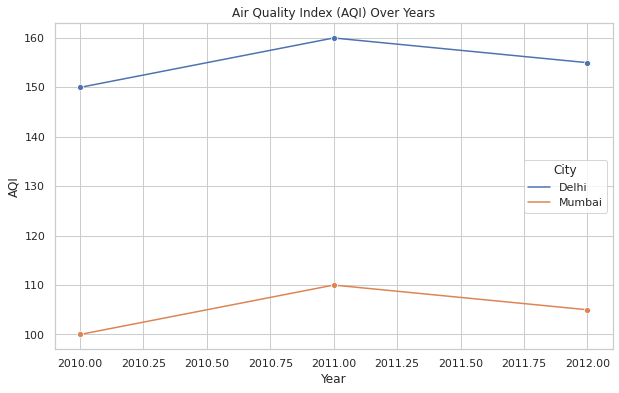

In [158]:
# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=pdf, x="Year", y="AQI", hue="City", marker="o")

# Add titles and labels
plt.title("Air Quality Index (AQI) Over Years")
plt.xlabel("Year")
plt.ylabel("AQI")

# Show the plot
plt.show()
